In [1]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import os
os.chdir('../src/')
#os.chdir('/home/crangel/PycharmProjects/EleccionesVenezuela2017/src/')
from data_treatment import update_dataframe
%matplotlib inline


In [2]:
#"/home/crangel/PycharmProjects/EleccionesVenezuela2017/data/EDO_DELTA_AMACURO.json"
df_deltaA =pd.read_json("../data/EDO_VARGAS.json",lines=True)
df_deltaA.columns

Index([u'ABSTENCION', u'ACTAS', u'ACTAS ESCRUTADAS', u'ACTAS VALIDAS',
       u'ALFREDO LAYA', u'AREVALO PEREZ', u'ARQUIMIDES RIVERO',
       u'ELECTORES ACTAS TRANSMITIDAS', u'ELECTORES INSCRITOS',
       u'ESTELA ROMERO', u'JOANDRY BLANCO', u'JORGE GARCIA CARNEIRO',
       u'JOSE MANUEL OLIVARES', u'LUIS ECHARRI', u'VOTANTES ESCRUTADOS',
       u'VOTOS ESCRUTADOS', u'VOTOS NULOS', u'VOTOS VALIDOS',
       u'WINSTON FLORES', u'centro', u'estado', u'mesa', u'municipio',
       u'parroquia'],
      dtype='object')

In [3]:
#DELTA AMACURO
#df_out = update_dataframe(df_deltaA,'LIZETA HERNANDEZ','LARISSA GONZALEZ')

#MONAGAS
#df_out = update_dataframe(df_deltaA,'YELITZE SANTAELLA','GUILLERMO CALL')

#MERIDA
#df_out = update_dataframe(df_deltaA,'JEHYSON GUZMAN','RAMON GUEVARA')

# VARGAS
df_out = update_dataframe(df_deltaA, 'JORGE GARCIA CARNEIRO', 'JOSE MANUEL OLIVARES')

df_out

,ABSTENCION,ACTAS,ACTAS ESCRUTADAS,ACTAS VALIDAS,ALFREDO LAYA,AREVALO PEREZ,ARQUIMIDES RIVERO,ELECTORES ACTAS TRANSMITIDAS,ELECTORES INSCRITOS,ESTELA ROMERO,...,MUD_N,rescaled_N,parroquia_residual,municipio_residual,centro_residual,estado_residual,parroquia_standarised_residual,municipio_standarised_residual,centro_standarised_residual,estado_standarised_residual
0,90,1,1,1,0,0,0,360,360,1,...,81,-0.12203,-0.472512,-0.293966,0.000000,-0.293966,-1.864370,-1.053286,0.000000,-1.053286
1,172,1,1,1,2,1,0,488,488,0,...,109,-0.12203,-0.387375,-0.219152,0.000000,-0.219152,-1.528450,-0.785228,0.000000,-0.785228
2,220,1,1,1,0,0,0,553,553,0,...,180,-0.12203,0.019043,0.137986,0.023144,0.137986,0.075136,0.494407,0.457379,0.494407
3,225,1,1,1,1,1,2,548,548,1,...,157,-0.12203,-0.051248,0.076218,-0.046853,0.076218,-0.202208,0.273091,-0.925937,0.273091
4,235,1,1,1,0,0,0,572,572,0,...,179,-0.12203,0.017932,0.137010,0.022038,0.137010,0.070753,0.490910,0.435520,0.490910
5,139,1,1,1,1,0,0,561,561,0,...,37,-0.12203,-0.950460,-0.713962,0.000000,-0.713962,-3.750192,-2.558141,0.000000,-2.558141
6,116,1,1,1,0,0,1,503,503,0,...,28,-0.12203,-0.988029,-0.746976,0.000000,-0.746976,-3.898428,-2.676431,0.000000,-2.676431
7,105,1,1,1,0,1,0,511,511,0,...,33,-0.12203,-0.969099,-0.730342,0.000000,-0.730342,-3.823737,-2.616828,0.000000,-2.616828
8,217,1,1,1,0,1,0,610,610,0,...,196,-0.12203,-0.066333,0.062962,0.030553,0.062962,-0.261727,0.225596,0.603811,0.225596
9,211,1,1,1,0,1,0,589,589,2,...,190,-0.12203,-0.034738,0.090727,0.059278,0.090727,-0.137064,0.325075,1.171474,0.325075


Index([                    u'ABSTENCION',                          u'ACTAS',
                     u'ACTAS ESCRUTADAS',                  u'ACTAS VALIDAS',
                         u'ALFREDO LAYA',                  u'AREVALO PEREZ',
                    u'ARQUIMIDES RIVERO',   u'ELECTORES ACTAS TRANSMITIDAS',
                  u'ELECTORES INSCRITOS',                  u'ESTELA ROMERO',
                       u'JOANDRY BLANCO',          u'JORGE GARCIA CARNEIRO',
                 u'JOSE MANUEL OLIVARES',                   u'LUIS ECHARRI',
                  u'VOTANTES ESCRUTADOS',               u'VOTOS ESCRUTADOS',
                          u'VOTOS NULOS',                  u'VOTOS VALIDOS',
                       u'WINSTON FLORES',                         u'centro',
                               u'estado',                           u'mesa',
                            u'municipio',                      u'parroquia',
                         u'Abstencion_%',                         u'PSUV_%',

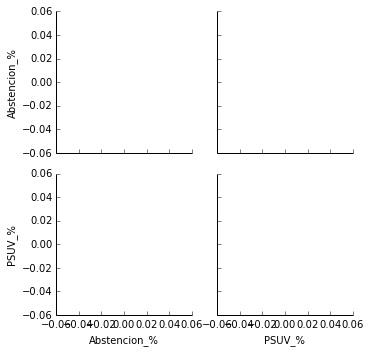

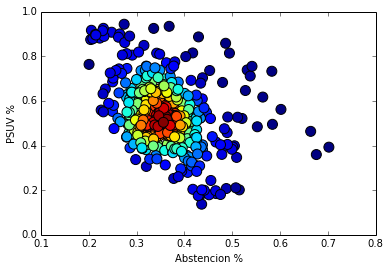

(-0.36234810373719339, 1.0179744684248939e-15)


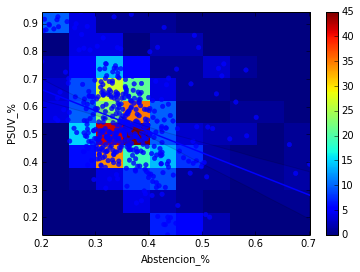

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr


print df_out.columns
sns.pairplot(df_out,vars=['Abstencion_%','PSUV_%']);

fig, ax = plt.subplots()
xy = np.vstack([df_out['Abstencion_%'], df_out['PSUV_%']])
z = gaussian_kde(xy)(xy)
ax.scatter(df_out['Abstencion_%'], df_out['PSUV_%'], c=z, s=100)
plt.xlabel('Abstencion %')
plt.ylabel('PSUV %')
plt.show()

plt.hist2d(df_out['Abstencion_%'],  df_out['PSUV_%'], (10, 10), cmap=plt.cm.jet)
plt.colorbar()

sns.regplot(x="Abstencion_%", y="PSUV_%", data=df_out);

print pearsonr(df_out["Abstencion_%"], df_out["PSUV_%"])


[]
0.0018527306754
1.0


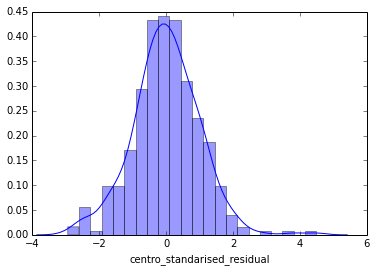

In [5]:
import math
sns.distplot(df_out[df_out['centro_standarised_residual']!=0]['centro_standarised_residual'])

list_centros = list(df_out[df_out['centro_standarised_residual']<-3]['centro'])

print list_centros


print df_out[df_out['centro_standarised_residual']!=0]['centro_standarised_residual'].mean()
print df_out[df_out['centro_standarised_residual']!=0]['centro_standarised_residual'].std()


-0.795549370494
0.982239135124
0.147999746502
0.907659795159
76605
78516


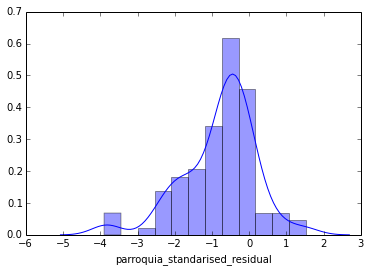

In [16]:
sns.distplot(df_out[df_out['centro_standarised_residual']==0]['parroquia_standarised_residual']);

print df_out[df_out['centro_standarised_residual']==0]['parroquia_standarised_residual'].mean()
print df_out[df_out['centro_standarised_residual']==0]['parroquia_standarised_residual'].std()

print df_out[df_out['centro_standarised_residual']!=0]['parroquia_standarised_residual'].mean()
print df_out[df_out['centro_standarised_residual']!=0]['parroquia_standarised_residual'].std()

#sns.distplot(df_out['PSUV_%']);
print df_out[df_out['centro_standarised_residual']!=0]['PSUV_N'].sum()
print df_out[df_out['centro_standarised_residual']!=0]['VOTOS VALIDOS'].sum()- df_out[df_out['centro_standarised_residual']!=0]['MUD_N'].sum()

167393

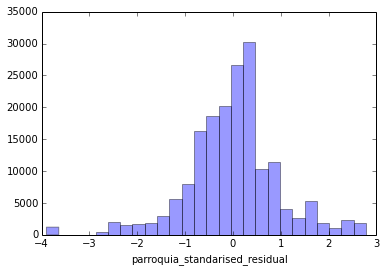

In [12]:
sns.distplot(df_out['parroquia_standarised_residual'],kde=False,hist_kws={'weights':df_out['VOTOS VALIDOS']});

list_centros = list(df_out[df_out['parroquia_standarised_residual']<2]['centro'])


df_out[df_out['centro']==list_centros[0]]

df_out[df_out['parroquia_standarised_residual']<2]['VOTOS VALIDOS'].sum()-df_out[df_out['parroquia_standarised_residual']>2]['VOTOS VALIDOS'].sum()

#df_out[df_out['parroquia_standarised_residual']<0]['VOTOS VALIDOS']-df_out[df_out['parroquia_standarised_residual']>0]['VOTOS VALIDOS']

#df_out['parroquia_standarised_residual'].mean()

#df_out['parroquia_standarised_residual'].kurt()



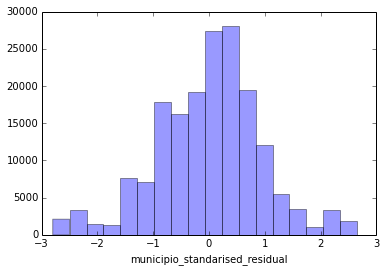

In [8]:
sns.distplot(df_out['municipio_standarised_residual'],kde=False,hist_kws={'weights':df_out['VOTOS VALIDOS']});


ValueError: `dataset` input should have multiple elements.

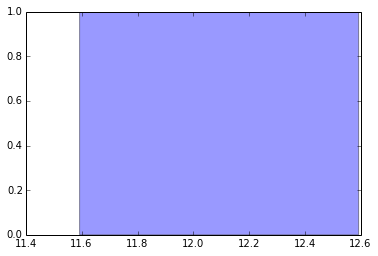

In [9]:
import math

list_centros = np.unique(df_out['municipio'])

rescaled_v = []
for i in list_centros:
    
    df = df_out[df_out['municipio']==i]
    
    rescaled_v.append(math.log(df['VOTOS VALIDOS'].sum()-df['PSUV_N'].sum()/float(df['PSUV_N'].sum())))
    
    
sns.distplot(np.array(rescaled_v));


In [ ]:
l = list(df_out.set_index('Abstencion_%').cumsum()['PSUV_N']/df_out['PSUV_N'].sum())
a = df_out['Abstencion_%']



sns.regplot(df_out['Abstencion_%'], np.array(l));

